# **GestureSpeak: A Deep Learning Approach for Sign Language Recognition**

In [ ]:
pip install opencv-python numpy tensorflow visualkeras

## **1. Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
import visualkeras

## **2. Data Preparation**

In [2]:

train_df = pd.read_csv("/content/sign_mnist_train.csv")

test_df = pd.read_csv("/content/sign_mnist_test.csv")


In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [5]:
print(train_df.shape, test_df.shape)

(27455, 785) (7172, 785)


In [6]:
print("Training Data Info:\n")
print(train_df.info())
print("\n\nTesting Data Info:\n")
print(test_df.info())

Training Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB
None


Testing Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB
None


In [7]:
train_df.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [8]:
test_df.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [9]:
count_plot = train_df['label'].value_counts()
count_plot

17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64

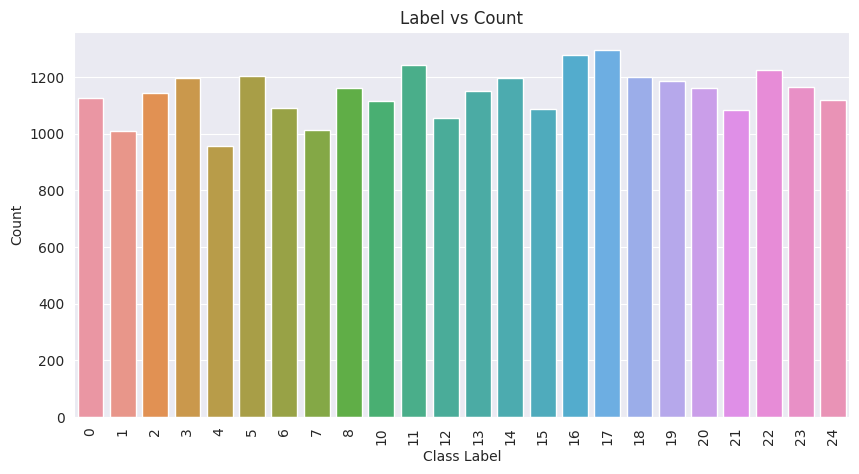

In [10]:
plt.figure(figsize = (10,5))
sns.set_style("darkgrid")
sns.barplot(x=count_plot.index, y=count_plot.values)
plt.xticks(rotation=90)
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Label vs Count')
plt.show()

In [11]:
# Extract the images and labels
X_train = np.array(train_df.drop(columns=['label']))
y_train = np.array(train_df['label'])

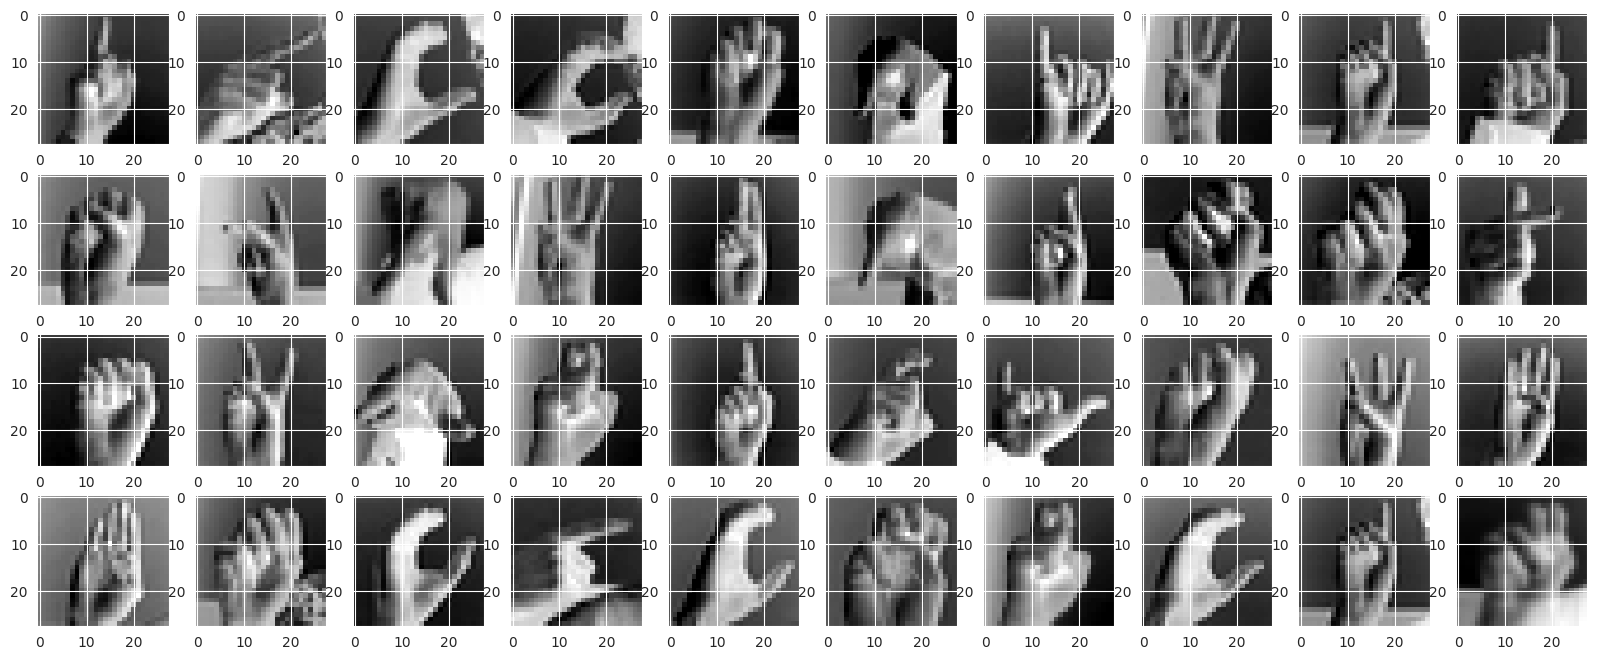

In [12]:
plt.figure(figsize=(20, 8))
x, y = 10, 4 
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray_r')
plt.show()

In [13]:
# Extract the images and labels
X_test = np.array(test_df.drop(columns=['label']))
y_test = np.array(test_df['label'])

In [14]:
# Define image size
IMG_SIZE = 28

# Normalize the pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0


In [15]:
# y_train = train_df['label']
# y_test = test_df['label']

# X_train = train_df.drop('label',axis=1)
# X_train = np.array(X_train,dtype='float32')/255

# X_test = test_df.drop('label',axis=1)
# X_test = np.array(X_test,dtype='float32')/255

# print('X_train : {}\n'.format(X_train[:]))
# print('Y-train shape: {}\n'.format(y_train))
# print('X_test shape: {}'.format(X_test.shape))

In [16]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [17]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [18]:
X_train, X_valid, y_train, y_valid= train_test_split(X_train, y_train, test_size=.05, random_state=1234)


In [19]:
# # Convert the labels to one-hot encoding
# encoder = OneHotEncoder(categories='auto')
# y_train = encoder.fit_transform(y_train.reshape((-1, 1))).toarray()
# y_test = encoder.transform(y_test.reshape((-1, 1))).toarray()

## **3. Data Augmentation**

In [20]:
datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.2,
        width_shift_range=0.1,
        height_shift_range=0.1)

datagen.fit(X_train)

## **4. Model Training**

In [21]:
# to prevent overfitting and improve the accuracy of the model

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1, factor=0.5, min_lr=0.00001)

In [22]:
model = Sequential()

In [23]:
# model architecture
model.add(Conv2D(45, kernel_size=(3,3), activation='relu', input_shape=(28,28,1), strides = 1, padding = 'same'))

model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides = 2, padding = 'same'))

model.add(Conv2D(55, kernel_size=(3,3), strides=1, padding='same', activation='relu'))

model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(units=24,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 45)        450       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 45)       180       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 45)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 55)        22330     
                                                                 
 dropout (Dropout)           (None, 14, 14, 55)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 55)       2

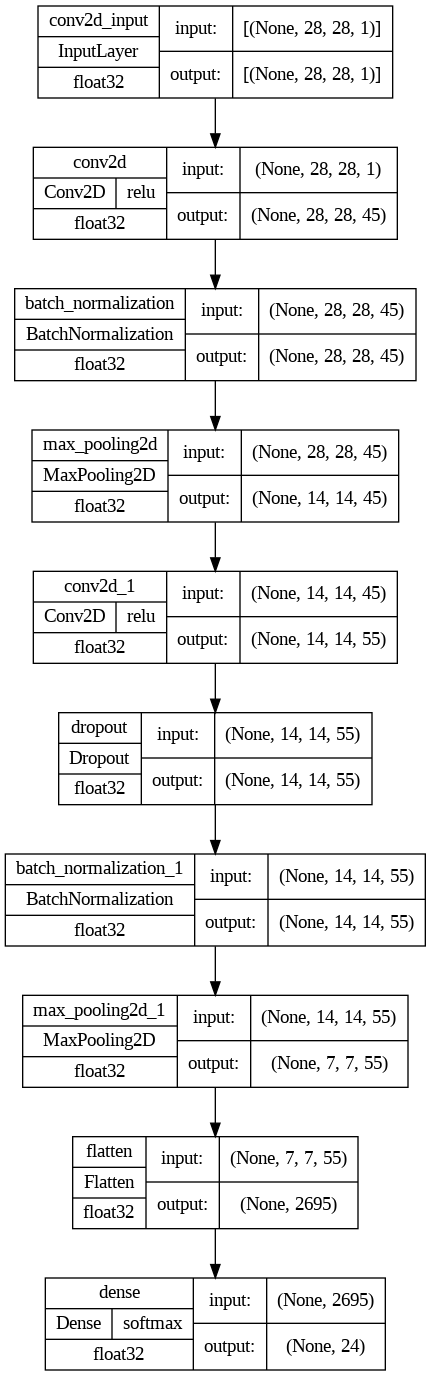

In [24]:
model_img_file = 'model.png'
tf.keras.utils.plot_model(model, to_file=model_img_file, 
                          show_shapes=True, 
                          show_layer_activations=True, 
                          show_dtype=True,
                          show_layer_names=True )

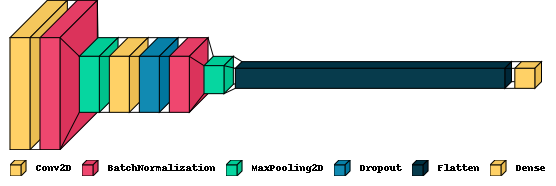

In [25]:
visualkeras.layered_view(model, legend = True)

In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
hist= model.fit(datagen.flow(X_train, y_train, batch_size=128), epochs=10, validation_data = (X_test,y_test), callbacks = [learning_rate_reduction])

Epoch 1/10
204/204 [==============================] - 81s 380ms/step - loss: 1.4298 - accuracy: 0.5655 - val_loss: 3.0889 - val_accuracy: 0.1497 - lr: 0.0010
Epoch 2/10
204/204 [==============================] - 77s 379ms/step - loss: 0.5568 - accuracy: 0.8193 - val_loss: 1.9240 - val_accuracy: 0.4230 - lr: 0.0010
Epoch 3/10
204/204 [==============================] - 76s 374ms/step - loss: 0.3383 - accuracy: 0.8903 - val_loss: 0.4996 - val_accuracy: 0.8385 - lr: 0.0010
Epoch 4/10
204/204 [==============================] - 74s 365ms/step - loss: 0.2497 - accuracy: 0.9195 - val_loss: 0.2033 - val_accuracy: 0.9313 - lr: 0.0010
Epoch 5/10
204/204 [==============================] - 75s 368ms/step - loss: 0.1947 - accuracy: 0.9367 - val_loss: 0.2197 - val_accuracy: 0.9292 - lr: 0.0010
Epoch 6/10
204/204 [==============================] - 77s 380ms/step - loss: 0.1560 - accuracy: 0.9498 - val_loss: 0.1297 - val_accuracy: 0.9618 - lr: 0.0010
Epoch 7/10
204/204 [==============================] 

## **5. Model Evaluation**

In [28]:
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

225/225 [==============================] - 5s 20ms/step - loss: 0.5567 - accuracy: 0.8139
Accuracy of the model is -  81.38594627380371 %


In [29]:
y_pred = np.argmax(model.predict(X_test),axis = 1) # predictions

225/225 [==============================] - 5s 24ms/step


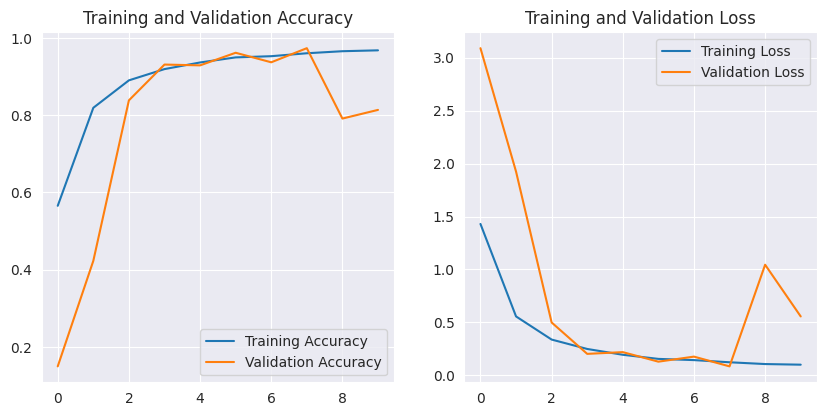

In [30]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [31]:
y_pred = to_categorical(y_pred)

In [36]:
y_pred = np.argmax(y_pred, axis=1)

In [38]:
y_test = np.argmax(y_test, axis=1)

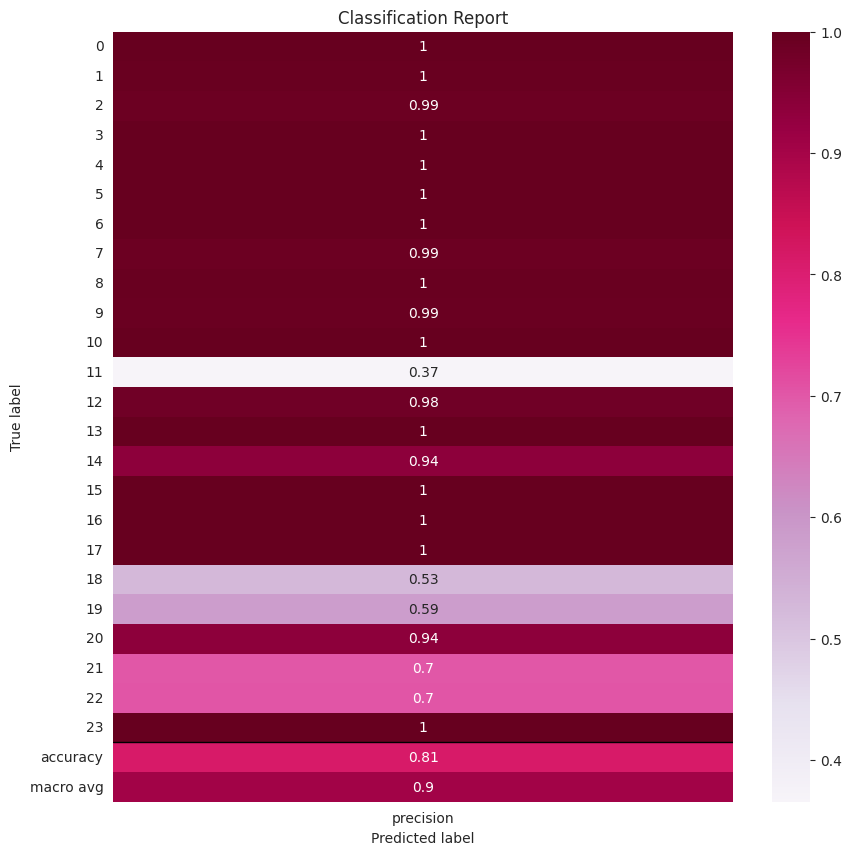

In [45]:
# classification report


from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, output_dict=True)

df = pd.DataFrame(report).transpose()

fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(df.iloc[:-1, :-3], annot=True, cmap='PuRd', cbar=True)

ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Classification Report')

plt.axhline(y=len(np.unique(y_test)), color='black', linewidth=1)

plt.show()

In [46]:
alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

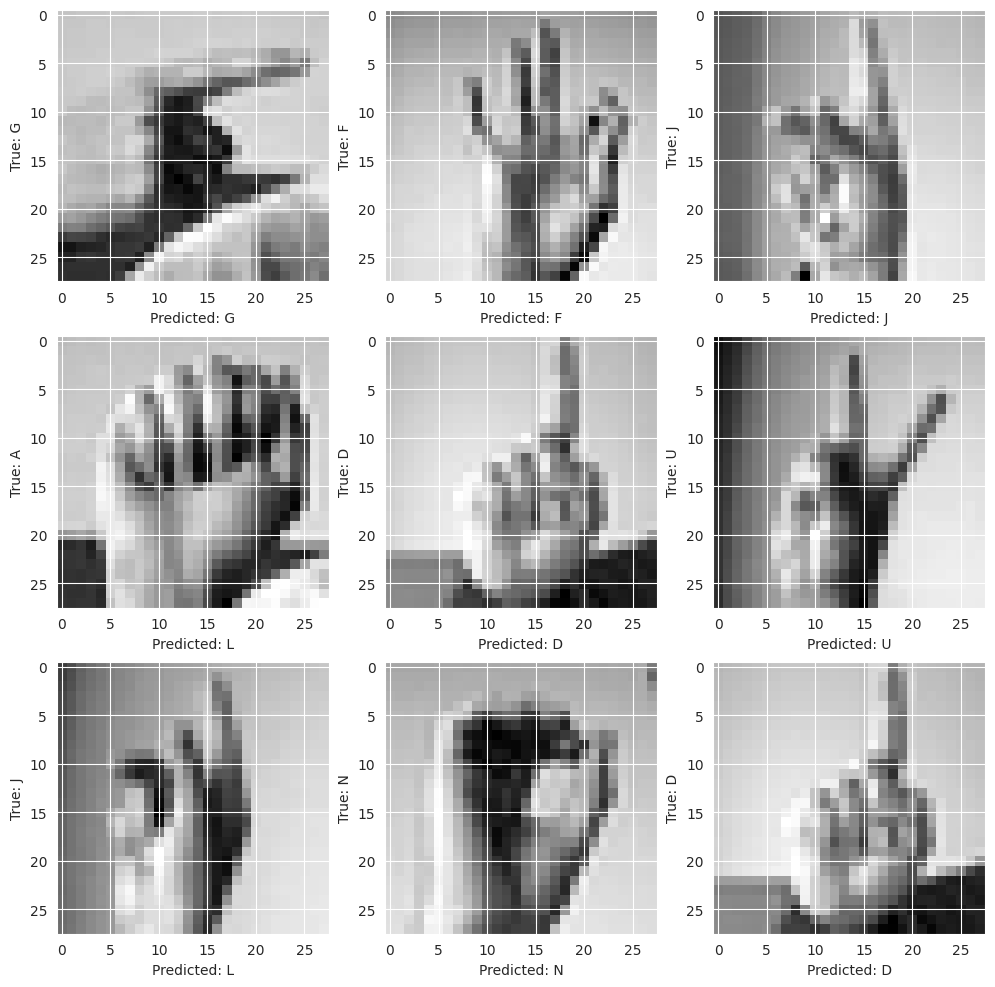

In [47]:
# final check

plt.figure(figsize=(12,12))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i],cmap='gray')
    plt.ylabel(f"True: {alphabet[y_test[i]]}")
    plt.xlabel(f"Predicted: {alphabet[y_pred[i]]}")
    
plt.show()